Basta con utilizar la regresión lineal con atributos polinómicos

Regresión polinomial con polinomio de grado 2 y las variables que mejor clasificaban excluyendo aquellas relacionadas con la potencia

In [33]:
#Paquetes necesarios:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math

In [34]:
#Se leen los datos
ciclistas = open ('/Users/34603/Desktop/TFG/Python/ciclistasVariablesSinNormalizarNiNombres.txt','r')
dataSet = list()
powerMean = list()

for linea in ciclistas: #Recorremos cada linea del archivo
    caracteristicas = linea.split()
    variables=[float(elemento) for elemento in caracteristicas[1:]]
    powerMean.append(float(caracteristicas[7])) #Vcetor de las variables a predecir
    dataSet.append(variables)
dataSet=np.array(dataSet) 

In [35]:
#Se seleccionan las variables que  mejor clasifican pero no tienen relacion aparente con la potencia
SeleccionVariables = dataSet[:,[18,24,34,39,40,41]]

In [36]:
def map2(x):
    n,m = x.shape
    #degree = 2
    out = x
    for i in range(m):
        for j in range(i,m):
            out = np.concatenate((out,x[:,i:i+1] * x[:,j:j+1]),1)
    return out

In [37]:
def map3(x):

    n,m = x.shape

    #degree = 3

    out = x

    for i in range(m):

        for j in range(i,m):

            out = np.concatenate((out,x[:,i:i+1] * x[:,j:j+1]),1)

    for i in range(m):

        for j in range(i,m):

            for k in range(j,m):

                out = np.concatenate((out,x[:,i:i+1] * x[:,j:j+1]*x[:,k:k+1]),1)

    return out

In [38]:
#Aplicamos el método que devuelve potencias de grado menor o igual que 2 de las variables
VariablesTransformadas = map2(SeleccionVariables)

#Se recomienda tener los datos normalizados antes de aplicar la regresión
mu=np.mean(VariablesTransformadas,axis=0)
sigma=np.std(VariablesTransformadas,axis=0)
VariablesTransfNormPol2 = ((VariablesTransformadas-mu)/sigma)


In [39]:
#Aplicamos el método que devuelve potencias de grado menor o igual que 2 de las variables
VariablesTransformadas = map3(SeleccionVariables)

#Se recomienda tener los datos normalizados antes de aplicar la regresión
mu=np.mean(VariablesTransformadas,axis=0)
sigma=np.std(VariablesTransformadas,axis=0)
VariablesTransfNormPol3 = ((VariablesTransformadas-mu)/sigma)


In [40]:
#Se crean los conjuntos de test y train con cross-validation utilizando una proporción de 0.3 para el test.
X_train3, X_test3, y_train3, y_test3 = train_test_split(VariablesTransfNormPol3, powerMean, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(VariablesTransfNormPol2, powerMean, test_size=0.3, random_state=42)


In [75]:
#Se crean los modelos de regresión lineal en función de C
Alpha1=np.linspace(1.0,2000.0,100)
modelos1 = list()
n=len(VariablesTransfNorm[:,0])
num_VariablesPol2 = len(VariablesTransfNorm[0,:])
num_VariablesPol3 = len(VariablesTransfNorm[0,:])

El menor valor de MSPE para el conjunto de testeo es: 0.6039313288775492
El valor del parámetro Alpha con el que se ha obtenido es: [2000.]


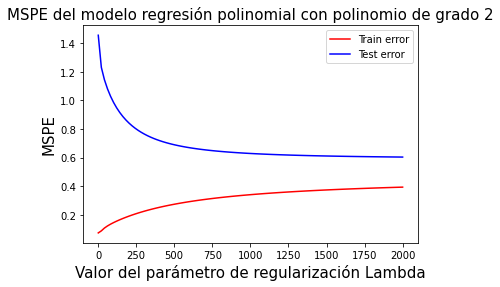

In [59]:
#Se calcula el error MSPE: (Polinomio grado2)
MSPEEntrenamiento1=list()
MSPETesteo1 = list()
for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    prediccionTesteo = modelo_reg.predict(X_test2)
    prediccionEntrenamiento = modelo_reg.predict(X_train2)
    i=-1
    j=-1
    MSPEtest=0
    MSPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSPEtest+= math.pow((y_test2[i]-p)/y_test2[i],2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSPEEntreno+= math.pow((y_train2[i]-p)/y_train2[i],2)
    MSPEEntrenamiento1.append(100*MSPEtest/n)
    MSPETesteo1.append(100*MSPEEntreno/n)
#Se busca el mejor error MSPE para el conjunto de testeo:
minMSPEtesteo = np.amin(MSPETesteo1)
print('El menor valor de MSPE para el conjunto de testeo es: ' + str(minMSPEtesteo))
#Ahora se busca el valor de lambda para el que se ha obtenido
posicion=np.where(MSPETesteo1 == minMSPEtesteo)
#El valor del parámetro lambda con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (CC1) con MSPE en función de C que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSPE del modelo regresión polinomial con polinomio de grado 2',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MSPE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSPEEntrenamiento1,'red', label = "Train error")
ax1.plot(Alpha1,MSPETesteo1, 'blue',label = "Test error")
plt.legend()
plt.show()


El menor valor de MSPE para el conjunto de testeo es: 0.6650569084595571
El valor del parámetro Alpha con el que se ha obtenido es: [2000.]


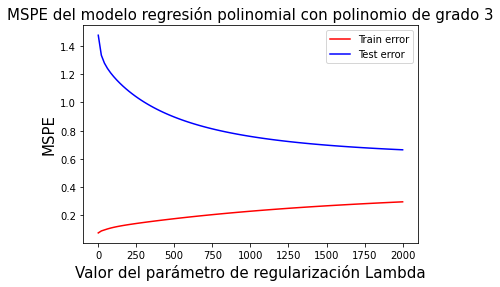

In [60]:
#Error MSPE polinomio de grado 3
MSPEEntrenamiento1=list()
MSPETesteo1 = list()
for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    prediccionTesteo = modelo_reg.predict(X_test3)
    prediccionEntrenamiento = modelo_reg.predict(X_train3)
    i=-1
    j=-1
    MSPEtest=0
    MSPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSPEtest+= math.pow((y_test3[i]-p)/y_test3[i],2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSPEEntreno+= math.pow((y_train3[i]-p)/y_train3[i],2)
    MSPEEntrenamiento1.append(100*MSPEtest/n)
    MSPETesteo1.append(100*MSPEEntreno/n)
#Se busca el mejor error MSPE para el conjunto de testeo:
minMSPEtesteo = np.amin(MSPETesteo1)
print('El menor valor de MSPE para el conjunto de testeo es: ' + str(minMSPEtesteo))
#Ahora se busca el valor de lambda para el que se ha obtenido
posicion=np.where(MSPETesteo1 == minMSPEtesteo)
#El valor del parámetro lambda con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (CC1) con MSPE en función de C que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSPE del modelo regresión polinomial con polinomio de grado 3',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MSPE', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSPEEntrenamiento1,'red', label = "Train error")
ax1.plot(Alpha1,MSPETesteo1, 'blue',label = "Test error")
plt.legend()
plt.show()


El menor valor de MAPE del conjunto de testeo es: 2.4059021504369236
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


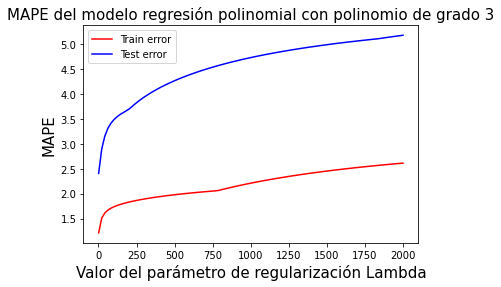

In [61]:
#Se continua calculando el error MAPE:
#Polinomio de grado 3
MAPEEntrenamiento1=list()
MAPETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    prediccionTesteo = modelo_reg.predict(X_test3)
    prediccionEntrenamiento = modelo_reg.predict(X_train3)
    i=-1
    j=-1
    MAPEtest=0
    MAPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAPEtest+= abs(y_test3[i]-p)/abs(y_test3[i])
    for p in prediccionEntrenamiento:
        j=j+1
        MAPEEntreno+= abs(y_train3[j]-p)/abs(y_train3[j])
    MAPEEntrenamiento1.append(100*MAPEtest/n)
    MAPETesteo1.append(100*MAPEEntreno/n)

#Se busca el menor valor del MAPE
maxMAPEtesteo = np.amin(MAPETesteo1)
print('El menor valor de MAPE del conjunto de testeo es: ' + str(maxMAPEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAPETesteo1 == maxMAPEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (CC1) con MAPE en función de Lambda que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAPE del modelo regresión polinomial con polinomio de grado 3',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MAPE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAPEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAPETesteo1,'blue',label="Test error")
plt.legend()
plt.show()



El menor valor de MAPE del conjunto de testeo es: 2.5610406889488893
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


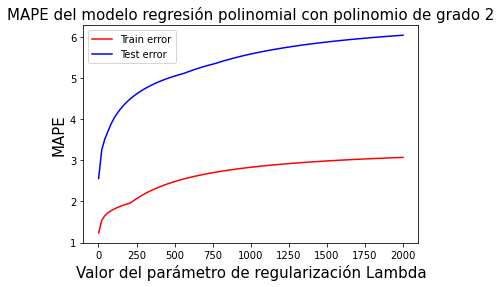

In [69]:
#Se continua calculando el error MAPE:
#Polinomio de grado 2
MAPEEntrenamiento1=list()
MAPETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    prediccionTesteo = modelo_reg.predict(X_test2)
    prediccionEntrenamiento = modelo_reg.predict(X_train2)
    i=-1
    j=-1
    MAPEtest=0
    MAPEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAPEtest+= abs(y_test2[i]-p)/abs(y_test2[i])
    for p in prediccionEntrenamiento:
        j=j+1
        MAPEEntreno+= abs(y_train2[j]-p)/abs(y_train2[j])
    MAPEEntrenamiento1.append(100*MAPEtest/n)
    MAPETesteo1.append(100*MAPEEntreno/n)

#Se busca el menor valor del MAPE
maxMAPEtesteo = np.amin(MAPETesteo1)
print('El menor valor de MAPE del conjunto de testeo es: ' + str(maxMAPEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAPETesteo1 == maxMAPEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (CC1) con MAPE en función de Lambda que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAPE del modelo regresión polinomial con polinomio de grado 2',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MAPE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAPEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAPETesteo1,'blue',label="Test error")
plt.legend()
plt.show()



mayor valor del coeficiente de determinación para el conjunto de testeo es 0.8241584059055123
El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: 0.8219875220278026
El valor del parámetro Alpha con el que se ha obtenido es: [6.35135135]


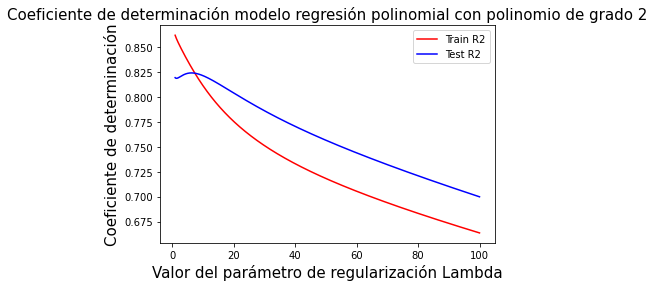

In [73]:
R2Entrenamiento1 = list()
Alpha1=np.linspace(1.0,100.0,1000)
R2Testeo1 = list()
for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    modelos1.append(modelo_reg)
    R2Entrenamiento1.append(modelo_reg.score(X_train2,y_train2))
    R2Testeo1.append(modelo_reg.score(X_test2,y_test2))
#Se busca el mayor valor del coeficiente de determinación
maxR2testeo = np.amax(R2Testeo1)
print('mayor valor del coeficiente de determinación para el conjunto de testeo es ' + str(maxR2testeo))
R2Ajustado=1-((num_Variables-1)/(num_Variables-2))*(1-maxR2testeo)
print('El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: ' + str(R2Ajustado))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(R2Testeo1 == np.amax(R2Testeo1))
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con r^2 en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('Coeficiente de determinación modelo regresión polinomial con polinomio de grado 2', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('Coeficiente de determinación', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,R2Entrenamiento1,'red', label="Train R2")
ax1.plot(Alpha1,R2Testeo1,'blue', label="Test R2")
plt.legend()
plt.show()

mayor valor del coeficiente de determinación para el conjunto de testeo es 0.822455825217551
El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: 0.820263921825175
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


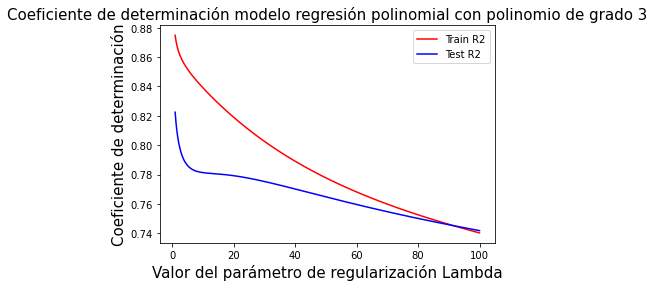

In [74]:
R2Entrenamiento1 = list()
R2Testeo1 = list()
Alpha1=np.linspace(1.0,100.0,1000)
for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    modelos1.append(modelo_reg)
    R2Entrenamiento1.append(modelo_reg.score(X_train3,y_train3))
    R2Testeo1.append(modelo_reg.score(X_test3,y_test3))
#Se busca el mayor valor del coeficiente de determinación
maxR2testeo = np.amax(R2Testeo1)
print('mayor valor del coeficiente de determinación para el conjunto de testeo es ' + str(maxR2testeo))
R2Ajustado=1-((num_Variables-1)/(num_Variables-2))*(1-maxR2testeo)
print('El mayor valor del coeficiente de determinación ajustado para el conjunto de testeo es: ' + str(R2Ajustado))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(R2Testeo1 == np.amax(R2Testeo1))
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con r^2 en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('Coeficiente de determinación modelo regresión polinomial con polinomio de grado 3', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('Coeficiente de determinación', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,R2Entrenamiento1,'red', label="Train R2")
ax1.plot(Alpha1,R2Testeo1,'blue', label="Test R2")
plt.legend()
plt.show()

El menor valor de RMSE del conjunto de testeo es: 8.499236816908343
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


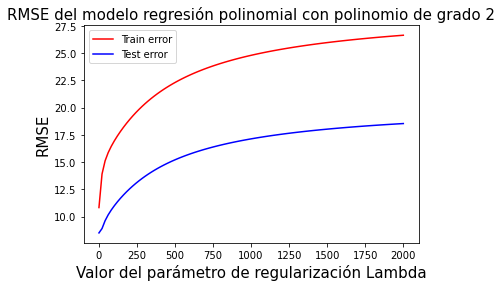

In [76]:
#Polinomio de grado 2
#Cálculo de RMSE:

RMSEEntrenamiento1 = list()
RMSETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    prediccionTesteo = modelo_reg.predict(X_test2)
    prediccionEntrenamiento = modelo_reg.predict(X_train2)
    i=-1
    j=-1
    RMSEtest=0
    RMSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        RMSEtest+= math.pow(y_test2[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        RMSEEntreno+= math.pow(y_train2[j]-p,2)
    RMSEEntrenamiento1.append(math.sqrt(RMSEEntreno/n))
    RMSETesteo1.append(math.sqrt(RMSEtest/n))

#Se busca el menor valor del RMSE
maxRMSEtesteo = np.amin(RMSETesteo1)
print('El menor valor de RMSE del conjunto de testeo es: ' + str(maxRMSEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(RMSETesteo1 == maxRMSEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con RMSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('RMSE del modelo regresión polinomial con polinomio de grado 2',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('RMSE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,RMSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,RMSETesteo1,'blue', label = "Test error")
plt.legend()
plt.show()

El menor valor de RMSE del conjunto de testeo es: 8.4266509859472
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


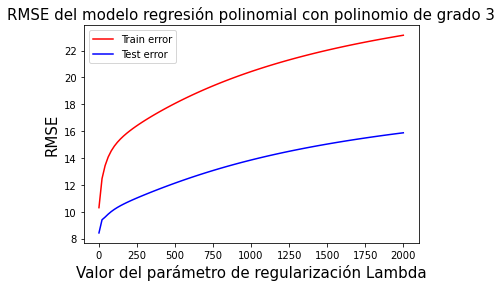

In [77]:
#Polinomio de grado 3
#Cálculo de RMSE:

RMSEEntrenamiento1 = list()
RMSETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    prediccionTesteo = modelo_reg.predict(X_test3)
    prediccionEntrenamiento = modelo_reg.predict(X_train3)
    i=-1
    j=-1
    RMSEtest=0
    RMSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        RMSEtest+= math.pow(y_test3[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        RMSEEntreno+= math.pow(y_train3[j]-p,2)
    RMSEEntrenamiento1.append(math.sqrt(RMSEEntreno/n))
    RMSETesteo1.append(math.sqrt(RMSEtest/n))

#Se busca el menor valor del RMSE
maxRMSEtesteo = np.amin(RMSETesteo1)
print('El menor valor de RMSE del conjunto de testeo es: ' + str(maxRMSEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(RMSETesteo1 == maxRMSEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con RMSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('RMSE del modelo regresión polinomial con polinomio de grado 3',fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('RMSE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,RMSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,RMSETesteo1,'blue', label = "Test error")
plt.legend()
plt.show()

El menor valor de MAE del conjunto de testeo es: 3.8639079008292287
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


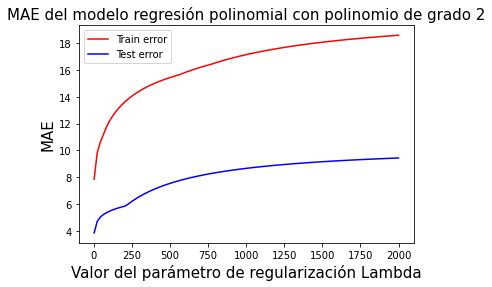

In [78]:
#Cálculo de MAE:
#Polinomio de grado 2
MAEEntrenamiento1 = list()
MAETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    prediccionTesteo = modelo_reg.predict(X_test2)
    prediccionEntrenamiento = modelo_reg.predict(X_train2)
    i=-1
    j=-1
    MAEtest=0
    MAEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAEtest+= abs(y_test2[i]-p)
    for p in prediccionEntrenamiento:
        j=j+1
        MAEEntreno+= abs(y_train2[j]-p)
    MAEEntrenamiento1.append(MAEEntreno/n)
    MAETesteo1.append(MAEtest/n)

#Se busca el menor valor del MAE
minMAEtesteo = np.amin(MAETesteo1)
print('El menor valor de MAE del conjunto de testeo es: ' + str(minMAEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAETesteo1 == minMAEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MAE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAE del modelo regresión polinomial con polinomio de grado 2', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MAE', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

El menor valor de MAE del conjunto de testeo es: 3.698636854478056
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


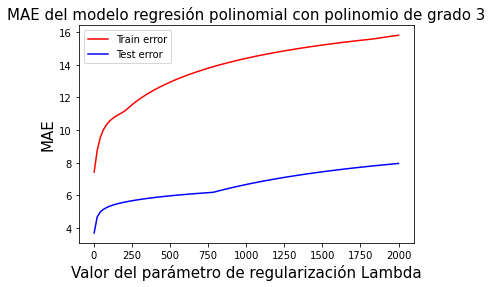

In [79]:
#Cálculo de MAE:
#Polinomio de grado 3
MAEEntrenamiento1 = list()
MAETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    prediccionTesteo = modelo_reg.predict(X_test3)
    prediccionEntrenamiento = modelo_reg.predict(X_train3)
    i=-1
    j=-1
    MAEtest=0
    MAEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MAEtest+= abs(y_test3[i]-p)
    for p in prediccionEntrenamiento:
        j=j+1
        MAEEntreno+= abs(y_train3[j]-p)
    MAEEntrenamiento1.append(MAEEntreno/n)
    MAETesteo1.append(MAEtest/n)

#Se busca el menor valor del MAE
minMAEtesteo = np.amin(MAETesteo1)
print('El menor valor de MAE del conjunto de testeo es: ' + str(minMAEtesteo))
#Ahora se busca el valor de C para el que se ha obtenido
posicion=np.where(MAETesteo1 == minMAEtesteo)
#El valor del parámetro C con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MAE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MAE del modelo regresión polinomial con polinomio de grado 3', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda',fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MAE', fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MAEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MAETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

El menor valor de MSE del conjunto de testeo es: 72.23702646989028
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


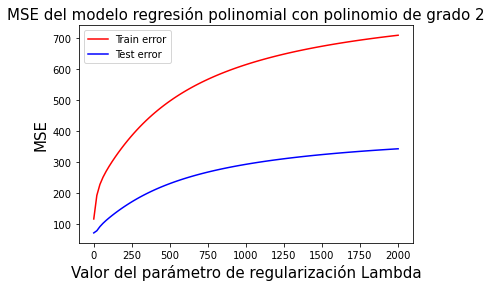

In [80]:
#Cálculo de MSE:
#Polinomio de grado 2
MSEEntrenamiento1 = list()
MSETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train2,y_train2)
    prediccionTesteo = modelo_reg.predict(X_test2)
    prediccionEntrenamiento = modelo_reg.predict(X_train2)
    i=-1
    j=-1
    MSEtest=0
    MSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSEtest+= math.pow(y_test2[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSEEntreno+= math.pow(y_train2[j]-p,2)
    MSEEntrenamiento1.append(MSEEntreno/n)
    MSETesteo1.append(MSEtest/n)

#Se busca el menor valor del MAE
minMSEtesteo = np.amin(MSETesteo1)
print('El menor valor de MSE del conjunto de testeo es: ' + str(minMSEtesteo))
#Ahora se busca el valor de Alpha para el que se ha obtenido
posicion=np.where(MSETesteo1 == minMSEtesteo)
#El valor del parámetro Alpha con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSE del modelo regresión polinomial con polinomio de grado 2', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MSE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MSETesteo1,'blue',label="Test error")
plt.legend()
plt.show()

El menor valor de MSE del conjunto de testeo es: 71.00844683896493
El valor del parámetro Alpha con el que se ha obtenido es: [1.]


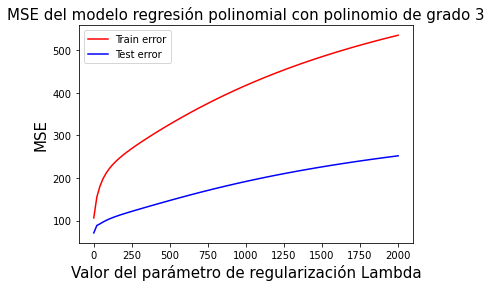

In [81]:
#Cálculo de MSE:
#Polinomio de grado 3
MSEEntrenamiento1 = list()
MSETesteo1 = list()

for alpha in Alpha1:
    modelo_reg=Ridge(alpha).fit(X_train3,y_train3)
    prediccionTesteo = modelo_reg.predict(X_test3)
    prediccionEntrenamiento = modelo_reg.predict(X_train3)
    i=-1
    j=-1
    MSEtest=0
    MSEEntreno=0
    for p in prediccionTesteo:
        i=i+1
        MSEtest+= math.pow(y_test3[i]-p,2)
    for p in prediccionEntrenamiento:
        j=j+1
        MSEEntreno+= math.pow(y_train3[j]-p,2)
    MSEEntrenamiento1.append(MSEEntreno/n)
    MSETesteo1.append(MSEtest/n)

#Se busca el menor valor del MAE
minMSEtesteo = np.amin(MSETesteo1)
print('El menor valor de MSE del conjunto de testeo es: ' + str(minMSEtesteo))
#Ahora se busca el valor de Alpha para el que se ha obtenido
posicion=np.where(MSETesteo1 == minMSEtesteo)
#El valor del parámetro Alpha con el que se ha obtenido es: 
print('El valor del parámetro Alpha con el que se ha obtenido es: ' + str(Alpha1[posicion]))

#Grafica (Alpha1) con MSE en función de Alpha que muestre el error del conjunto de entrenamiento y el error del conjunto de testeo
figRegresionLineal1 = plt.figure()
ax1 = figRegresionLineal1.add_subplot(111)
 # Establecer título
ax1.set_title('MSE del modelo regresión polinomial con polinomio de grado 3', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización Lambda', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('MSE',fontsize=15)
 # Dibujar diagrama de dispersión
ax1.plot(Alpha1,MSEEntrenamiento1,'red',label="Train error")
ax1.plot(Alpha1,MSETesteo1,'blue',label="Test error")
plt.legend()
plt.show()